# Метод опорных векторов

При классификации пытается провести прямую так, чтобы она разделяла классы и расстояние от прямой до ближайших границ классов было минимальным. Допускается пересечение некоторого количества образцов - граница мягкая. С - параметр регуляризации, обратно пропорциональный силе регуляризации

При регрессии минимизируется сумма квадратов потерь (дистанция от точек вне зазора до зазора).

Поддерживаются ядра - нелинейные функции для выичисления расстояний:

- linear: $<x, x'>$
- poly: $(gamma * <x,x'>+ coef0)^{degree}$
- rbf: $\exp(-gamma*||x - x'||^2)$
- sigmoid: $\tanh(gamma<x, x'>+coef0)$

## Задача классификации

In [5]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


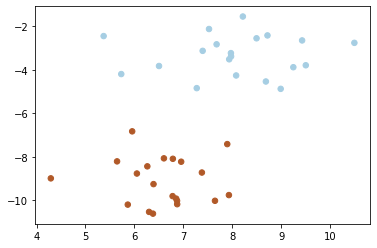

In [6]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [7]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

In [10]:
clf.predict([[5, -8]])

array([1])

## Нелинейная классификация

ядро rbf

In [11]:
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

In [12]:
clf = svm.SVC(kernel='rbf' , gamma="auto")
clf.fit(X, Y)

SVC(gamma='auto')

In [13]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

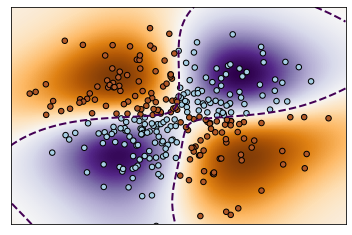

In [14]:
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired, edgecolors="k")
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## Регрессия

In [15]:
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

regr.predict([[1, 1]])

array([1.5])

##  Использование своих ядер

In [16]:
import numpy as np
from sklearn import svm
def my_kernel(X, Y):
    return np.dot(X, Y.T)

clf = svm.SVC(kernel=my_kernel)